# Collaborative Based Recommendation
## Funk Singular Value Decomposition (FunkSVD)

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
users_df =pd.read_pickle("clean_interactions.pkl")
users_df.head()

,user_id,recipe_id,date,rating,review,review_month,review_year
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,Feb,2003
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",Dec,2011
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,Dec,2002
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,Feb,2010
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",Oct,2011


In [4]:
users_df = users_df[['user_id', 'recipe_id', 'rating']]
users_df.head()

,user_id,recipe_id,rating
0,38094,40893,4
1,1293707,40893,5
2,8937,44394,4
3,126440,85009,5
4,57222,85009,5


In [8]:
users_df[users_df['user_id'] == '38094']

,user_id,recipe_id,rating
0,38094,40893,4
6879,38094,16954,5
73153,38094,40753,5
108069,38094,34513,5
126804,38094,69545,5
154564,38094,49064,4
159916,38094,80044,5
176845,38094,30565,5
177313,38094,29493,5
183558,38094,34509,5


In [10]:
users_df[users_df['recipe_id'] == '16954']

,user_id,recipe_id,rating
6879,38094,16954,5
6880,13593,16954,5
6881,40525,16954,5
6882,40114,16954,4
6883,926169,16954,3


In [8]:
df =pd.read_pickle("food.pkl")
df[df['votes'] > 1400]

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian,recipe_id,average_rating,votes
60842,crock pot chicken with black beans cream cheese,89204,243,137839,2004-04-16,"['time-to-make', 'course', 'main-ingredient', ...",5,"['take 4-5 frozen , yes , frozen , boneless ch...",i love this crock-pot chicken recipe for two r...,"['boneless chicken breasts', 'black beans', 'c...",...,Apr,2004,0,0,0,0,0,89204,4.478495,1488
195952,to die for crock pot roast,27208,545,28201,2002-05-03,"['weeknight', 'time-to-make', 'course', 'main-...",7,"['place beef roast in crock pot', 'mix the dri...","amazing flavor, and so simple! no salt needed ...","['beef roast', 'brown gravy mix', 'dried itali...",...,May,2002,0,0,0,0,0,27208,4.589572,1496


In [4]:
# Import libraries
from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD

In [5]:
# Load our dataframe as a special Dataset object from surprise
dataset = Dataset.load_from_df(users_df, Reader(rating_scale=(1, 5)))
train_dataset = dataset.build_full_trainset()

In [6]:
train_dataset

In [7]:
# Initialize the algorithm, specify the number of latent variables and iterations we'd like to use, and then let the algorithm run.
algorithm = FunkSVD(n_factors=10, 
                       n_epochs=100, 
                       lr_all=0.1,    # Learning rate for each epoch
                       biased=False,  # This forces the algorithm to store all latent information in the matrices
                       verbose=0)

algorithm.fit(train_dataset)

In [8]:
# The user matrix is stored under the SVD.pu attribute
U = algorithm.pu
U.shape

(195947, 10)

In [9]:
# The recipe matrix is stored under the SVD,qi attribute, and it is transposed
R = algorithm.qi.T
R.shape

(10, 226583)

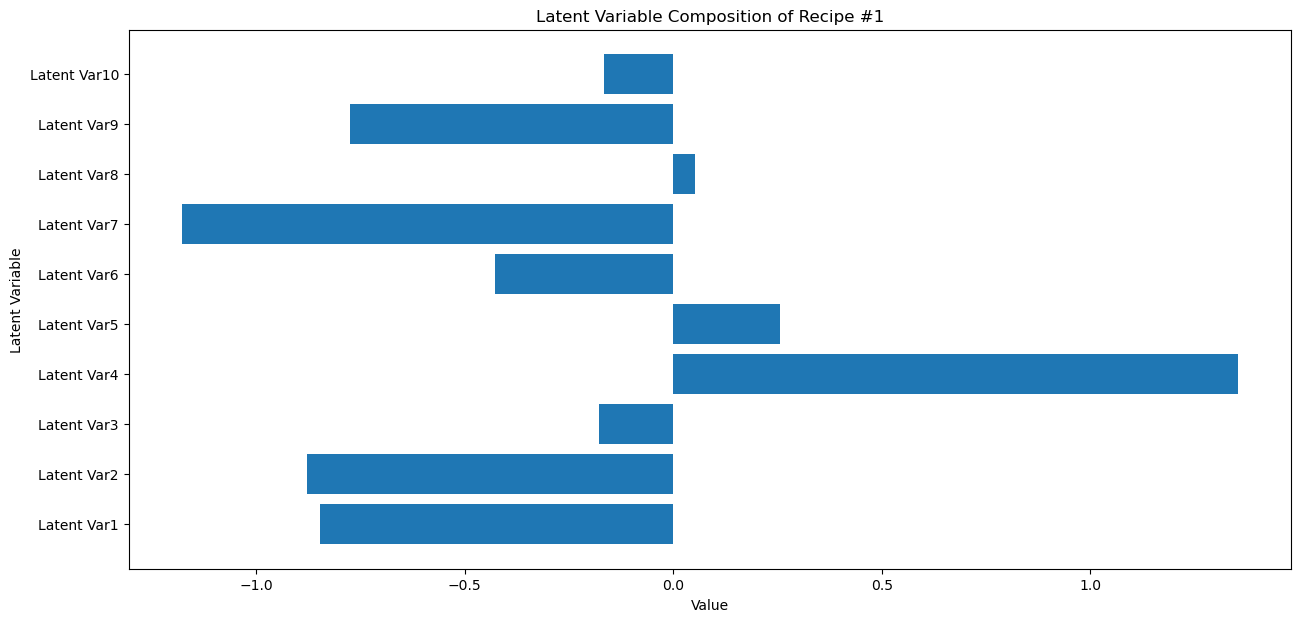

In [10]:
# Explore the latent factors are by picking a recipe
first_recipe = R[:, 0]

plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_recipe)+1)], first_recipe)
plt.title("Latent Variable Composition of Recipe #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [14]:
# User profile
inner_user_id = train_dataset.to_inner_uid('38094') # find the inner representation of user 1
user_profile = U[inner_user_id]
user_profile

array([ 0.54323127, -1.77057112, -0.38009462,  1.14023768,  0.07242832,
       -0.28139272, -0.8160562 ,  0.23669563, -0.22113538, -0.48869606])

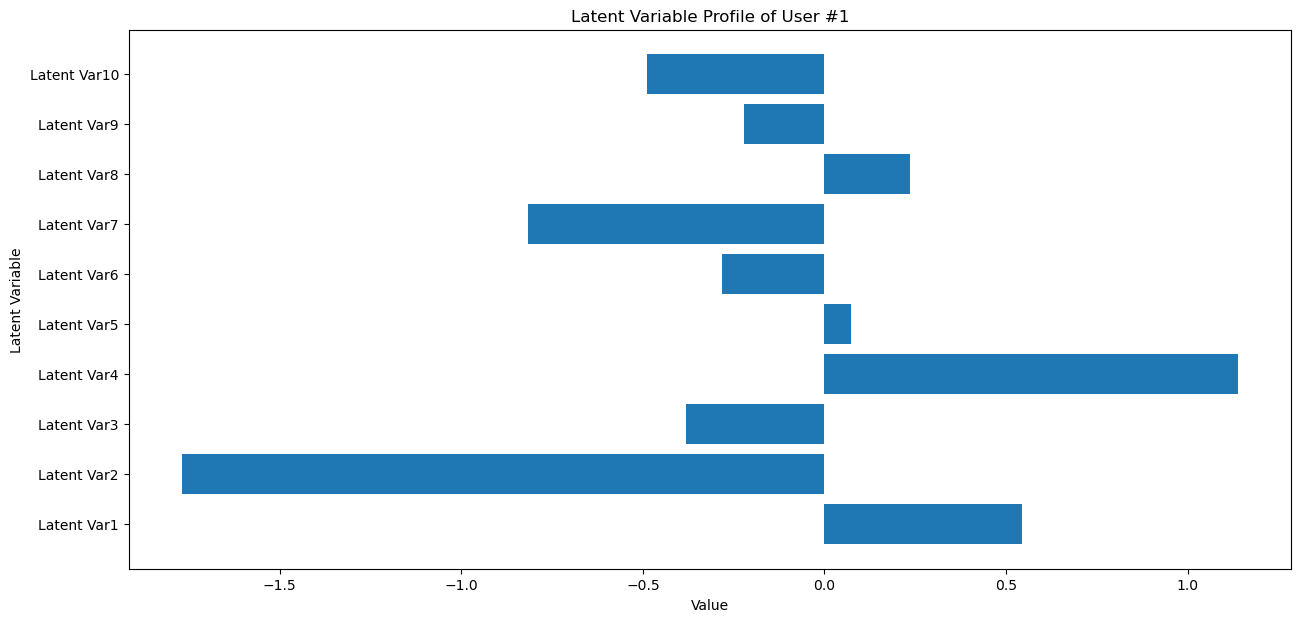

In [15]:
plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_recipe)+1)], user_profile)
plt.title("Latent Variable Profile of User #1")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

In [19]:
# Recipe profile
inner_recipe_id = train_dataset.to_inner_iid('40893') # find the inner representation of item 1
recipe_profile = R[:, inner_recipe_id]
recipe_profile

array([-0.84784616, -0.87835633, -0.17873275,  1.35560434,  0.25664307,
       -0.4277591 , -1.17913561,  0.05135925, -0.77447278, -0.1668035 ])

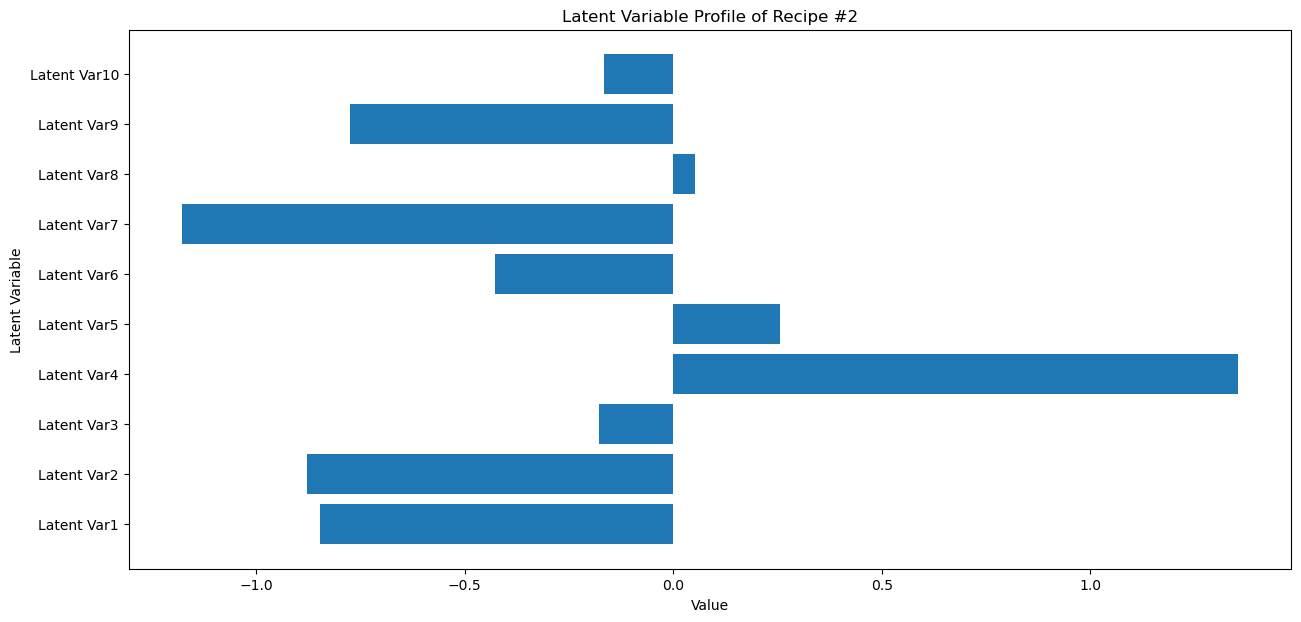

In [20]:
plt.figure(figsize=(15, 7))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_recipe)+1)], recipe_profile)
plt.title("Latent Variable Profile of Recipe #2")
plt.ylabel("Latent Variable")
plt.xlabel("Value")
plt.show()

The rating of this recipe by this user is the dot product of these two profiles:

In [21]:
# For the recommendation system
expected_rating = np.dot(user_profile, recipe_profile)
expected_rating

# For a user you can calculate all the expected ratings
# Remove ratings of movies they have watched
# Rank what's left
# Take the top 10 values of ratings (top 10 imputed NaN values)

4.074395795271103

In reality, our ratings will get better and better as we use more latent variables. However, too many latent variables and we might be overfitting.